This notebook compares the different scatterig model solutions for cod larvae.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
import array as arr
import inverse_method_funs as inv

In [2]:
sns.set_theme(style="darkgrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black'}

# Load data
### ZooScatR results

In [3]:
# Calculated with runCodLarvae.RMD
fname_TS = '../ZooScatStuff/my_codlarvae_TS.feather'
TS = pd.read_feather(fname_TS)
fname_freq = '../ZooScatStuff/my_codlarvae_freq.feather'
freqs_zsr = pd.read_feather(fname_freq)
print(freqs_zsr)

     res_TS.var
0     10.000000
1     11.001252
2     12.002503
3     13.003755
4     14.005006
..          ...
795  805.994994
796  806.996245
797  807.997497
798  808.998748
799  810.000000

[800 rows x 1 columns]


In [4]:
# Add a row for sigma_bs calculated from TS
sigbs_zsr = 10**(TS/10)

### Viscous elastic model results

In [5]:
cod_scat = pd.read_csv('CODlarvae.txt', header=None, delimiter=' ', names=['frequency', 'TS'], skiprows=1)
cod_sigbs_ve = 10**(cod_scat['TS']/10)
freqs_ve = cod_scat['frequency']/1000

## Plot Comparison

Text(0.5, 0, 'Frequency (kHz)')

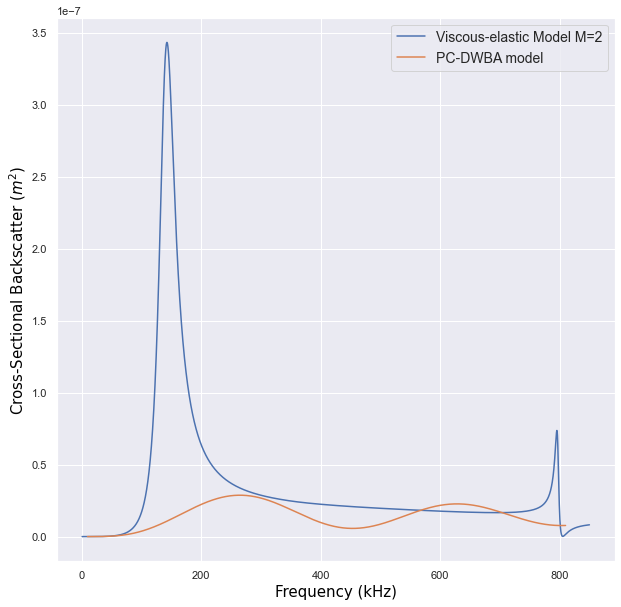

In [6]:
fig=plt.figure(figsize=(10, 10),facecolor='w', edgecolor='k')
plt.plot(freqs_ve,cod_sigbs_ve, label='Viscous-elastic Model M=2')
plt.plot(freqs_zsr,sigbs_zsr, label='PC-DWBA model')
#plt.xlim([min(freqs_zsr),max(freqs_zsr)])
plt.legend(fontsize=14)
plt.ylabel('Cross-Sectional Backscatter ($m^{2}$)', axis_font)
plt.xlabel('Frequency (kHz)', axis_font)

# Use reader function

In [7]:
fname = '../ZooScatStuff/my_data.feather'
specs, freqs, sig_bs_sim, sig_mean = inv.read_scatteringmodelsimulations(fname, nsim=1000, ve=True)

Text(0, 0.5, 'sv ($m_{-1}$)')

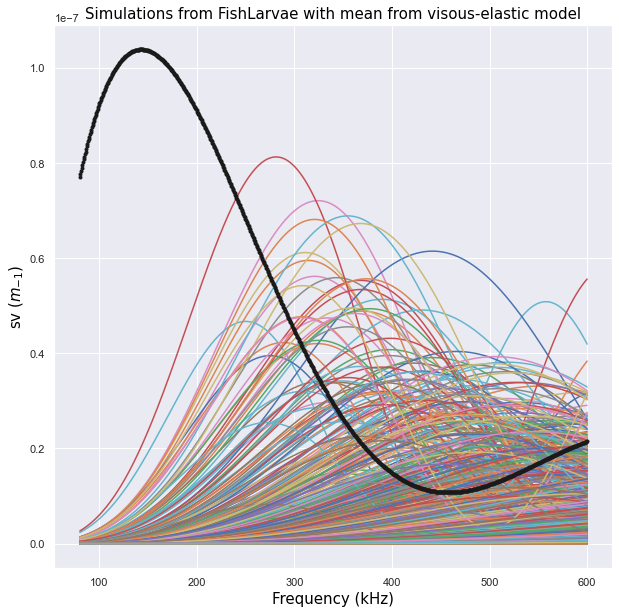

In [13]:
fig=plt.figure(figsize=(10, 10),facecolor='w', edgecolor='k')
plt.plot(freqs,sig_bs_sim[:,:,6], freqs, sig_mean[:,6], '.k')
plt.title('Simulations from %s with mean from visous-elastic model' %(specs[6]), title_font)

plt.xlabel('Frequency (kHz)', axis_font)
plt.ylabel('sv ($m_{-1}$)', axis_font)

In [9]:
np.where(freqs_ve==0)

(array([], dtype=int64),)